Logistic regression >> https://michael-fuchs-python.netlify.app/2019/11/15/multinomial-logistic-regression/

https://www.askpython.com/python/examples/fitting-a-logistic-regression-model

In [ ]:
from google.colab import files
uploaded = files.upload()#"standardizedallstats.csv"

Saving standardizedallstats.csv to standardizedallstats.csv


In [ ]:
from google.colab import files
uploaded = files.upload()#"mergedstats2022.csv"

Saving mergedstats2022.csv to mergedstats2022.csv


In [ ]:
from google.colab import files
uploaded = files.upload()#"standardizedtest2022.csv"

Saving standardizedtest2022.csv to standardizedtest2022.csv


In [ ]:
import pandas as pd
newdf = pd.read_csv("standardizedallstats.csv", encoding="latin-1", delimiter=",")
newdf

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Player,Pos,Age,Tm,G,GS,MP,...,W,L,W/L%,GB,PS/G,PA/G,SRS,TS%,Rank,MVP
0,0,0,-1.792522,?an Tabak,C,-0.886218,HOU,-0.716531,-0.912480,-1.501674,...,0.473361,-0.473361,0.472185,-0.112700,0.431817,-0.006957,0.509455,0.021818,0.0,0
1,1,1,-1.792274,Adrian Caldwell,PF,0.174886,HOU,-1.903423,-0.912480,-1.558538,...,0.473361,-0.473361,0.472185,-0.112700,0.431817,-0.006957,0.509455,-1.687118,0.0,0
2,2,2,-1.792026,Carl Herrera,PF,0.174886,HOU,0.232983,-0.044511,0.100016,...,0.473361,-0.473361,0.472185,-0.112700,0.431817,-0.006957,0.509455,0.293066,0.0,0
3,3,3,-1.791778,Charles Jones,PF,2.562368,HOU,-2.061675,-0.912480,-0.828774,...,0.473361,-0.473361,0.472185,-0.112700,0.431817,-0.006957,0.509455,-1.371853,0.0,0
4,4,4,-1.791529,Chucky Brown,SF,-0.355666,HOU,-0.558279,-0.445112,-0.080055,...,0.473361,-0.473361,0.472185,-0.112700,0.431817,-0.006957,0.509455,1.134430,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,14087,453,1.831852,Mike Dunleavy,SG-PF,-0.091724,IND,1.113670,0.769627,1.025399,...,-0.539712,0.539712,-0.537997,0.472111,-0.766293,-0.165552,-0.676847,0.302459,0.0,0
14088,14088,454,1.832122,Orien Greene,SG,-0.555920,IND,-0.563355,-0.933388,-1.363893,...,-0.539712,0.539712,-0.537997,0.472111,-0.766293,-0.165552,-0.676847,-0.908281,0.0,0
14089,14089,455,1.832391,Rawle Marshall,SG,-0.555920,IND,-0.604258,-0.863877,-1.099466,...,-0.539712,0.539712,-0.537997,0.472111,-0.766293,-0.165552,-0.676847,-0.480678,0.0,0
14090,14090,456,1.832660,Shawne Williams,SG,-1.484312,IND,-0.358839,-0.829121,-0.806706,...,-0.539712,0.539712,-0.537997,0.472111,-0.766293,-0.165552,-0.676847,0.202020,0.0,0


In [ ]:
import pandas as pd #stats used for creating a table at the end, NOT FOR PREDICTION
stats2022 = pd.read_csv("mergedstats2022.csv", encoding="latin-1", delimiter=",")
import numpy as np

In [ ]:
import pandas as pd
import numpy as np
test1 = pd.read_csv("standardizedtest2022.csv", encoding="latin-1", delimiter=",")


In [ ]:
player_list = newdf.Player
index_list = newdf.index
zip_player_index = zip(index_list, player_list)
dict_player_index = dict(zip_player_index)
dict_player_index

{0: '?an Tabak',
 1: 'Adrian Caldwell',
 2: 'Carl Herrera',
 3: 'Charles Jones',
 4: 'Chucky Brown',
 5: 'Clyde Drexler',
 6: 'Hakeem Olajuwon',
 7: 'Kenny Smith',
 8: 'Mario Elie',
 9: 'Pete Chilcutt',
 10: 'Robert Horry',
 11: 'Sam Cassell',
 12: 'Tim Breaux',
 13: 'Tracy Murray',
 14: 'Vernon Maxwell',
 15: 'A.C. Green',
 16: 'Aaron Swinson',
 17: 'Antonio Lang',
 18: 'Charles Barkley',
 19: 'Dan Majerle',
 20: 'Danny Ainge',
 21: 'Danny Manning',
 22: 'Danny Schayes',
 23: 'Elliot Perry',
 24: 'Joe Kleine',
 25: 'Kevin Johnson',
 26: 'Richard Dumas',
 27: 'Trevor Ruffin',
 28: 'Wayman Tisdale',
 29: 'Wesley Person',
 30: 'Aaron McKie',
 31: 'Buck Williams',
 32: 'Chris Dudley',
 33: 'Clifford Robinson',
 34: 'Harvey Grant',
 35: 'James Edwards',
 36: 'James Robinson',
 37: 'Jerome Kersey',
 38: 'Mark Bryant',
 39: 'Otis Thorpe',
 40: 'Rod Strickland',
 41: 'Steve Henson',
 42: 'Terry Porter',
 43: 'Aaron Williams',
 44: 'Alton Lister',
 45: 'Danny Young',
 46: 'Ed Pinckney',
 47: '

In [ ]:
year_list = newdf.Year
zip_year_index = zip(index_list, year_list)
dict_year_index = dict(zip_year_index)
dict_year_index

{0: 1995.0,
 1: 1995.0,
 2: 1995.0,
 3: 1995.0,
 4: 1995.0,
 5: 1995.0,
 6: 1995.0,
 7: 1995.0,
 8: 1995.0,
 9: 1995.0,
 10: 1995.0,
 11: 1995.0,
 12: 1995.0,
 13: 1995.0,
 14: 1995.0,
 15: 1995.0,
 16: 1995.0,
 17: 1995.0,
 18: 1995.0,
 19: 1995.0,
 20: 1995.0,
 21: 1995.0,
 22: 1995.0,
 23: 1995.0,
 24: 1995.0,
 25: 1995.0,
 26: 1995.0,
 27: 1995.0,
 28: 1995.0,
 29: 1995.0,
 30: 1995.0,
 31: 1995.0,
 32: 1995.0,
 33: 1995.0,
 34: 1995.0,
 35: 1995.0,
 36: 1995.0,
 37: 1995.0,
 38: 1995.0,
 39: 1995.0,
 40: 1995.0,
 41: 1995.0,
 42: 1995.0,
 43: 1995.0,
 44: 1995.0,
 45: 1995.0,
 46: 1995.0,
 47: 1995.0,
 48: 1995.0,
 49: 1995.0,
 50: 1995.0,
 51: 1995.0,
 52: 1995.0,
 53: 1995.0,
 54: 1995.0,
 55: 1995.0,
 56: 1995.0,
 57: 1995.0,
 58: 1995.0,
 59: 1995.0,
 60: 1995.0,
 61: 1995.0,
 62: 1995.0,
 63: 1995.0,
 64: 1995.0,
 65: 1995.0,
 66: 1995.0,
 67: 1995.0,
 68: 1995.0,
 69: 1995.0,
 70: 1995.0,
 71: 1995.0,
 72: 1995.0,
 73: 1995.0,
 74: 1995.0,
 75: 1995.0,
 76: 1995.0,
 77: 1995

In [ ]:
team_list = newdf.Tm
zip_team_index = zip(index_list, team_list)
dict_team_index = dict(zip_team_index)
dict_team_index

{0: 'HOU',
 1: 'HOU',
 2: 'HOU',
 3: 'HOU',
 4: 'HOU',
 5: 'HOU',
 6: 'HOU',
 7: 'HOU',
 8: 'HOU',
 9: 'HOU',
 10: 'HOU',
 11: 'HOU',
 12: 'HOU',
 13: 'HOU',
 14: 'HOU',
 15: 'PHO',
 16: 'PHO',
 17: 'PHO',
 18: 'PHO',
 19: 'PHO',
 20: 'PHO',
 21: 'PHO',
 22: 'PHO',
 23: 'PHO',
 24: 'PHO',
 25: 'PHO',
 26: 'PHO',
 27: 'PHO',
 28: 'PHO',
 29: 'PHO',
 30: 'POR',
 31: 'POR',
 32: 'POR',
 33: 'POR',
 34: 'POR',
 35: 'POR',
 36: 'POR',
 37: 'POR',
 38: 'POR',
 39: 'POR',
 40: 'POR',
 41: 'POR',
 42: 'POR',
 43: 'MIL',
 44: 'MIL',
 45: 'MIL',
 46: 'MIL',
 47: 'MIL',
 48: 'MIL',
 49: 'MIL',
 50: 'MIL',
 51: 'MIL',
 52: 'MIL',
 53: 'MIL',
 54: 'MIL',
 55: 'MIL',
 56: 'MIL',
 57: 'BOS',
 58: 'BOS',
 59: 'BOS',
 60: 'BOS',
 61: 'BOS',
 62: 'BOS',
 63: 'BOS',
 64: 'BOS',
 65: 'BOS',
 66: 'BOS',
 67: 'BOS',
 68: 'BOS',
 69: 'BOS',
 70: 'BOS',
 71: 'BOS',
 72: 'BOS',
 73: 'UTA',
 74: 'UTA',
 75: 'UTA',
 76: 'UTA',
 77: 'UTA',
 78: 'UTA',
 79: 'UTA',
 80: 'UTA',
 81: 'UTA',
 82: 'UTA',
 83: 'UTA',
 8

In [ ]:
newdf = newdf.drop(["Unnamed: 0"], axis = 1)
newdf

,Unnamed: 0.1,Unnamed: 0.1.1,Player,Pos,Age,Tm,G,GS,MP,FG,...,W,L,W/L%,GB,PS/G,PA/G,SRS,TS%,Rank,MVP
0,0,-1.792522,?an Tabak,C,-0.886218,HOU,-0.716531,-0.912480,-1.501674,-1.133253,...,0.473361,-0.473361,0.472185,-0.112700,0.431817,-0.006957,0.509455,0.021818,0.0,0
1,1,-1.792274,Adrian Caldwell,PF,0.174886,HOU,-1.903423,-0.912480,-1.558538,-1.353423,...,0.473361,-0.473361,0.472185,-0.112700,0.431817,-0.006957,0.509455,-1.687118,0.0,0
2,2,-1.792026,Carl Herrera,PF,0.174886,HOU,0.232983,-0.044511,0.100016,-0.164503,...,0.473361,-0.473361,0.472185,-0.112700,0.431817,-0.006957,0.509455,0.293066,0.0,0
3,3,-1.791778,Charles Jones,PF,2.562368,HOU,-2.061675,-0.912480,-0.828774,-1.265355,...,0.473361,-0.473361,0.472185,-0.112700,0.431817,-0.006957,0.509455,-1.371853,0.0,0
4,4,-1.791529,Chucky Brown,SF,-0.355666,HOU,-0.558279,-0.445112,-0.080055,-0.252571,...,0.473361,-0.473361,0.472185,-0.112700,0.431817,-0.006957,0.509455,1.134430,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,453,1.831852,Mike Dunleavy,SG-PF,-0.091724,IND,1.113670,0.769627,1.025399,0.736740,...,-0.539712,0.539712,-0.537997,0.472111,-0.766293,-0.165552,-0.676847,0.302459,0.0,0
14088,454,1.832122,Orien Greene,SG,-0.555920,IND,-0.563355,-0.933388,-1.363893,-1.075008,...,-0.539712,0.539712,-0.537997,0.472111,-0.766293,-0.165552,-0.676847,-0.908281,0.0,0
14089,455,1.832391,Rawle Marshall,SG,-0.555920,IND,-0.604258,-0.863877,-1.099466,-0.986630,...,-0.539712,0.539712,-0.537997,0.472111,-0.766293,-0.165552,-0.676847,-0.480678,0.0,0
14090,456,1.832660,Shawne Williams,SG,-1.484312,IND,-0.358839,-0.829121,-0.806706,-0.633118,...,-0.539712,0.539712,-0.537997,0.472111,-0.766293,-0.165552,-0.676847,0.202020,0.0,0


In [ ]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14092 entries, 0 to 14091
Data columns (total 46 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0.1    14092 non-null  int64  
 1   Unnamed: 0.1.1  14092 non-null  float64
 2   Player          14092 non-null  object 
 3   Pos             14092 non-null  object 
 4   Age             14092 non-null  float64
 5   Tm              14092 non-null  object 
 6   G               14092 non-null  float64
 7   GS              14092 non-null  float64
 8   MP              14092 non-null  float64
 9   FG              14092 non-null  float64
 10  FGA             14092 non-null  float64
 11  FG%             14092 non-null  float64
 12  3P              14092 non-null  float64
 13  3PA             14092 non-null  float64
 14  3P%             14092 non-null  float64
 15  2P              14092 non-null  float64
 16  2PA             14092 non-null  float64
 17  2P%             14092 non-null 

In [ ]:
newdf.columns

Index(['Unnamed: 0.1', 'Unnamed: 0.1.1', 'Player', 'Pos', 'Age', 'Tm', 'G',
       'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'Year', 'Pts Won', 'Pts Max', 'Share', 'Team', 'W',
       'L', 'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS', 'TS%', 'Rank', 'MVP'],
      dtype='object')

In [ ]:
categorical = [val for val in newdf.columns[newdf.dtypes == "O"]]
categorical

['Player', 'Pos', 'Tm', 'Team']

# remove player column value on player too because it doesn't play the role.

In [ ]:
newdf = newdf.drop(["Player"], axis =1 )
newdf

,Unnamed: 0.1,Unnamed: 0.1.1,Pos,Age,Tm,G,GS,MP,FG,FGA,...,W,L,W/L%,GB,PS/G,PA/G,SRS,TS%,Rank,MVP
0,0,-1.792522,C,-0.886218,HOU,-0.716531,-0.912480,-1.501674,-1.133253,-1.180332,...,0.473361,-0.473361,0.472185,-0.112700,0.431817,-0.006957,0.509455,0.021818,0.0,0
1,1,-1.792274,PF,0.174886,HOU,-1.903423,-0.912480,-1.558538,-1.353423,-1.351556,...,0.473361,-0.473361,0.472185,-0.112700,0.431817,-0.006957,0.509455,-1.687118,0.0,0
2,2,-1.792026,PF,0.174886,HOU,0.232983,-0.044511,0.100016,-0.164503,-0.324215,...,0.473361,-0.473361,0.472185,-0.112700,0.431817,-0.006957,0.509455,0.293066,0.0,0
3,3,-1.791778,PF,2.562368,HOU,-2.061675,-0.912480,-0.828774,-1.265355,-1.265944,...,0.473361,-0.473361,0.472185,-0.112700,0.431817,-0.006957,0.509455,-1.371853,0.0,0
4,4,-1.791529,SF,-0.355666,HOU,-0.558279,-0.445112,-0.080055,-0.252571,-0.581050,...,0.473361,-0.473361,0.472185,-0.112700,0.431817,-0.006957,0.509455,1.134430,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,453,1.831852,SG-PF,-0.091724,IND,1.113670,0.769627,1.025399,0.736740,0.780007,...,-0.539712,0.539712,-0.537997,0.472111,-0.766293,-0.165552,-0.676847,0.302459,0.0,0
14088,454,1.832122,SG,-0.555920,IND,-0.563355,-0.933388,-1.363893,-1.075008,-1.096115,...,-0.539712,0.539712,-0.537997,0.472111,-0.766293,-0.165552,-0.676847,-0.908281,0.0,0
14089,455,1.832391,SG,-0.555920,IND,-0.604258,-0.863877,-1.099466,-0.986630,-0.948555,...,-0.539712,0.539712,-0.537997,0.472111,-0.766293,-0.165552,-0.676847,-0.480678,0.0,0
14090,456,1.832660,SG,-1.484312,IND,-0.358839,-0.829121,-0.806706,-0.633118,-0.674514,...,-0.539712,0.539712,-0.537997,0.472111,-0.766293,-0.165552,-0.676847,0.202020,0.0,0


In [ ]:
indexTest_list = test1.index
player_list = test1.Player
zip_player_index22 = zip(indexTest_list, player_list)
dict_player_index22 = dict(zip_player_index22)
dict_player_index22

{0: 'Aaron Gordon',
 1: 'Austin Rivers',
 2: 'Bol Bol',
 3: 'Bones Hyland',
 4: 'Bryn Forbes',
 5: 'Carlik Jones',
 6: 'Davon Reed',
 7: 'DeMarcus Cousins',
 8: 'Facundo Campazzo',
 9: 'JaMychal Green',
 10: 'James Ennis III',
 11: 'Jeff Green',
 12: 'Markus Howard',
 13: 'Michael Porter Jr.',
 14: 'Monte Morris',
 15: 'Nikola Jokic',
 16: 'PJ Dozier',
 17: 'Petr Cornelie',
 18: 'Vlatko Cancar',
 19: 'Will Barton',
 20: 'Zeke Nnaji',
 21: 'Aaron Henry',
 22: 'Charles Bassey',
 23: 'Charlie Brown Jr.',
 24: 'Danny Green',
 25: 'DeAndre Jordan',
 26: 'Furkan Korkmaz',
 27: 'Georges Niang',
 28: 'Isaiah Joe',
 29: 'Jaden Springer',
 30: 'James Harden',
 31: 'Joel Embiid',
 32: 'Matisse Thybulle',
 33: 'Myles Powell',
 34: 'Paul Millsap',
 35: 'Paul Reed',
 36: 'Shake Milton',
 37: 'Tobias Harris',
 38: 'Tyrese Maxey',
 39: 'Willie Cauley-Stein',
 40: 'Aaron Holiday',
 41: 'Abdel Nader',
 42: 'Bismack Biyombo',
 43: 'Cameron Johnson',
 44: 'Cameron Payne',
 45: 'Chandler Hutchison',
 46: '

In [ ]:
newdf.Pos.unique()

array(['C', 'PF', 'SF', 'SG', 'PG', 'SG-PG', 'SF-PF', 'SG-SF', 'PF-C',
       'PF-SF', 'SF-SG', 'PG-SG', 'C-PF', 'PG-SF', 'SG-PF', 'SF-C'],
      dtype=object)

# Shift column MVP to the first column

In [ ]:
first_column = newdf.pop('MVP')
  
# insert column using insert(position,column_name,
# first_column) function
newdf.insert(0, 'MVP', first_column)
df = newdf.rename(columns={'TS_percent':'TS%'})

df

,MVP,Unnamed: 0.1,Unnamed: 0.1.1,Pos,Age,Tm,G,GS,MP,FG,...,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,TS%,Rank
0,0,0,-1.792522,C,-0.886218,HOU,-0.716531,-0.912480,-1.501674,-1.133253,...,Houston Rockets,0.473361,-0.473361,0.472185,-0.112700,0.431817,-0.006957,0.509455,0.021818,0.0
1,0,1,-1.792274,PF,0.174886,HOU,-1.903423,-0.912480,-1.558538,-1.353423,...,Houston Rockets,0.473361,-0.473361,0.472185,-0.112700,0.431817,-0.006957,0.509455,-1.687118,0.0
2,0,2,-1.792026,PF,0.174886,HOU,0.232983,-0.044511,0.100016,-0.164503,...,Houston Rockets,0.473361,-0.473361,0.472185,-0.112700,0.431817,-0.006957,0.509455,0.293066,0.0
3,0,3,-1.791778,PF,2.562368,HOU,-2.061675,-0.912480,-0.828774,-1.265355,...,Houston Rockets,0.473361,-0.473361,0.472185,-0.112700,0.431817,-0.006957,0.509455,-1.371853,0.0
4,0,4,-1.791529,SF,-0.355666,HOU,-0.558279,-0.445112,-0.080055,-0.252571,...,Houston Rockets,0.473361,-0.473361,0.472185,-0.112700,0.431817,-0.006957,0.509455,1.134430,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,0,453,1.831852,SG-PF,-0.091724,IND,1.113670,0.769627,1.025399,0.736740,...,Indiana Pacers,-0.539712,0.539712,-0.537997,0.472111,-0.766293,-0.165552,-0.676847,0.302459,0.0
14088,0,454,1.832122,SG,-0.555920,IND,-0.563355,-0.933388,-1.363893,-1.075008,...,Indiana Pacers,-0.539712,0.539712,-0.537997,0.472111,-0.766293,-0.165552,-0.676847,-0.908281,0.0
14089,0,455,1.832391,SG,-0.555920,IND,-0.604258,-0.863877,-1.099466,-0.986630,...,Indiana Pacers,-0.539712,0.539712,-0.537997,0.472111,-0.766293,-0.165552,-0.676847,-0.480678,0.0
14090,0,456,1.832660,SG,-1.484312,IND,-0.358839,-0.829121,-0.806706,-0.633118,...,Indiana Pacers,-0.539712,0.539712,-0.537997,0.472111,-0.766293,-0.165552,-0.676847,0.202020,0.0


Remove dependent variables  >> pts won, pts max,share and rank

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14092 entries, 0 to 14091
Data columns (total 45 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MVP             14092 non-null  int64  
 1   Unnamed: 0.1    14092 non-null  int64  
 2   Unnamed: 0.1.1  14092 non-null  float64
 3   Pos             14092 non-null  object 
 4   Age             14092 non-null  float64
 5   Tm              14092 non-null  object 
 6   G               14092 non-null  float64
 7   GS              14092 non-null  float64
 8   MP              14092 non-null  float64
 9   FG              14092 non-null  float64
 10  FGA             14092 non-null  float64
 11  FG%             14092 non-null  float64
 12  3P              14092 non-null  float64
 13  3PA             14092 non-null  float64
 14  3P%             14092 non-null  float64
 15  2P              14092 non-null  float64
 16  2PA             14092 non-null  float64
 17  2P%             14092 non-null 

we want to only look at these features

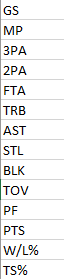

# Waiting for some more features to be removed.

In [ ]:
#split train/test
#X = df.drop(["G","MP","FG","FGA","FG%","eFG%","3P","3P%","2P","2P%","FT","FT%","ORB","DRB","Year","MVP","Pts Won","Tm","Pos","Pts Max","Share","W","L","GB","Rank","PS/G","PA/G"], axis = 1)
y = df.MVP
X = df[["Age","GS","3PA","2PA","FTA","TRB","AST","STL","BLK","TOV","PF","PTS","W/L%","SRS","TS%"]]
X.dtypes

Age     float64
GS      float64
3PA     float64
2PA     float64
FTA     float64
TRB     float64
AST     float64
STL     float64
BLK     float64
TOV     float64
PF      float64
PTS     float64
W/L%    float64
SRS     float64
TS%     float64
dtype: object

In [ ]:
indexTest_list = test1.index
player_list = test1.Player
zip_player_index22 = zip(indexTest_list, player_list)
dict_player_index22 = dict(zip_player_index22)
dict_player_index22
player22list = list(dict_player_index22.values())

# feature importance >> https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

model.feature_importances_
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization

#feat_importances = pd.Series(model.feature_importances_, index=X.columns)
#feat_importances.nlargest(10).plot(kind='barh')
#plt.show()

array([0.03650096, 0.04957839, 0.03681626, 0.09823452, 0.10567462,
       0.05533523, 0.06984462, 0.04941539, 0.04193543, 0.06962764,
       0.03379707, 0.149852  , 0.08377051, 0.07371793, 0.04589944])

In [ ]:
list(X.columns)
classvalsdf = pd.DataFrame(columns = ["Age","GS","3PA","2PA","FTA","TRB","AST","STL","BLK","TOV","PF","PTS","W/L%","SRS","TS%"])
classvalsdf

,Age,GS,3PA,2PA,FTA,TRB,AST,STL,BLK,TOV,PF,PTS,W/L%,SRS,TS%


#Declare number of times to run loop

In [ ]:
n = 500

#Get column names of top 10 most important variables
Run loop 100 times to get average

---



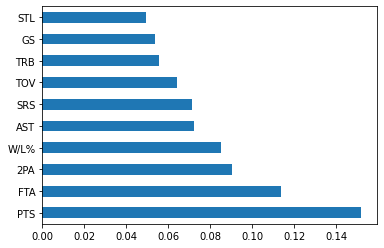

Age     0.035417
GS      0.053504
3PA     0.035201
2PA     0.090194
FTA     0.113745
TRB     0.055351
AST     0.072112
STL     0.049350
BLK     0.041542
TOV     0.064160
PF      0.034665
PTS     0.151903
W/L%    0.085197
SRS     0.071226
TS%     0.046437
dtype: float64


,PTS,FTA,2PA,W/L%,AST,SRS,TOV,TRB,GS,STL


In [ ]:
classvalsdf = pd.DataFrame(columns = ["Age","GS","3PA","2PA","FTA","TRB","AST","STL","BLK","TOV","PF","PTS","W/L%","SRS","TS%"])

for x in range(0, n):
  from sklearn.ensemble import ExtraTreesClassifier
  import matplotlib.pyplot as plt
  X = df[["Age","GS","3PA","2PA","FTA","TRB","AST","STL","BLK","TOV","PF","PTS","W/L%","SRS","TS%"]]
  model = ExtraTreesClassifier()
  model.fit(X,y)

  classvalsdf.loc[x] =  model.feature_importances_.tolist()

feat_importances = classvalsdf.mean(axis=0)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

print(classvalsdf.mean(axis=0))

col_name = pd.DataFrame(columns = classvalsdf.mean(axis=0).sort_values(ascending=False).head(10).keys()) #ugliest code I've written in my LIFE 3:25am
col_name

# Run a For Loop

In [ ]:
acc = 0
inacc= 0
right0 = 0
right1 = 0
right2 = 0
wrong0 = 0
wrong1 = 0
wrong2 = 0
accuracy = 0

X = X[list(col_name)]

test2022 = test1[list(col_name)]

avg_df0 = pd.DataFrame(columns = [col_name])
avg_df1 = pd.DataFrame(columns = [col_name])
avg_df2 = pd.DataFrame(columns = [col_name])

prob22df_1 = pd.DataFrame(columns = [list(range(0,605))])
prob22df_2 = pd.DataFrame(columns = [list(range(0,605))])
                      
for x in range(0, n):
  avg_list0 = []
  avg_list1 = []
  avg_list2 = []

  trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.2)

  log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100000) #fit the model
  log_reg.fit(trainX, trainY)
  y_pred = log_reg.predict(testX)

  set(y_pred)

  from sklearn.metrics import accuracy_score
  acc += accuracy_score(testY, y_pred)
  inacc += 1-acc

  testX['Actual_MVP'] = testY
  testX['Predicted_MVP'] = y_pred #predY is the column formed by the model we trained. testY is the true label whether the particular play is MVP, non MVP, or MVP candidate.
  testX

  Player = []
  Year = []
  Team = []
  for row in testX.index:
    Player.append(dict_player_index[row])
    Year.append(dict_year_index[row])
    Team.append(dict_team_index[row])

  testX["Player"] = Player
  testX["Team"] = Team
  testX["Year"] = Year

  import numpy as np
  misclassified = testX.iloc[np.where(testX.Actual_MVP != testX.Predicted_MVP)]
  len(misclassified)
  accurated_classified = testX.iloc[np.where(testX.Actual_MVP == testX.Predicted_MVP)]

  misclassified_0 = misclassified.iloc[np.where(misclassified.Actual_MVP == 0)]
  misclassified_1 = misclassified.iloc[np.where(misclassified.Actual_MVP == 1)]
  misclassified_2 = misclassified.iloc[np.where(misclassified.Actual_MVP == 2)]
  accurated_classified_0 = accurated_classified.iloc[np.where(accurated_classified.Actual_MVP == 0)]
  accurated_classified_1 = accurated_classified.iloc[np.where(accurated_classified.Actual_MVP == 1)]
  accurated_classified_2 = accurated_classified.iloc[np.where(accurated_classified.Actual_MVP == 2)]

  wrong0 += len(misclassified_0)
  wrong1 += len(misclassified_1)
  wrong2 += len(misclassified_2)
  right0 += len(accurated_classified_0)
  right1 += len(accurated_classified_1)
  right2 += len(accurated_classified_2)


  for i in accurated_classified_0.columns[0:10]:
    avg_list0.append(accurated_classified_0[i].mean()) #create a list 
    avg_list1.append(accurated_classified_1[i].mean())
    avg_list2.append(accurated_classified_2[i].mean())
  
  avg_df0.loc[x] = avg_list0
  avg_df1.loc[x] = avg_list1
  avg_df2.loc[x] = avg_list2 #will eventually take a sum of each column then divide by number of row

  prob_test22 = log_reg.predict_proba(test2022)
  prob22_class1 = []
  prob22_class2 = []
  for j in range(len(prob_test22)):
    prob22_class1.append(prob_test22[j][1])
    prob22_class2.append(prob_test22[j][2])

  prob22df_1.loc[x] = prob22_class1
  prob22df_2.loc[x] = prob22_class2

  print(avg_list0)
  print(prob_test22.size)


[-0.1048759765202475, -0.10630580559989747, -0.0939149387760234, -0.010678618507389827, -0.08595488184804062, -0.013602732011646322, -0.08397603225822195, -0.05782346828876037, -0.0728923960492429, -0.08960657910657656]
1815
[-0.09354596437808516, -0.10457940509178738, -0.07779654042878327, -0.06400876350270632, -0.08681970126481536, -0.06191980312069699, -0.08868210177347963, -0.057427064348350335, -0.06987088381073299, -0.07340884766763849]
1815
[-0.09387669759567534, -0.11473958564245626, -0.08893682629735829, -0.05160636265697043, -0.09041999821235559, -0.0576243356184276, -0.10517800608071463, -0.06470274093456763, -0.08304738103326371, -0.06473640404676667]
1815
[-0.09081952421905681, -0.09274281241829185, -0.07350554210780602, -0.03912331730004637, -0.08361198423012552, -0.03553173924637016, -0.08152270953622354, -0.053400087754972604, -0.06323250592839985, -0.05773845135661195]
1815
[-0.08575891911296386, -0.0952622998159608, -0.07013619583331934, -0.042187313667354176, -0.0774

In [ ]:
stats2022 = stats2022[list(col_name)]
#print(type(prob22df_1.mean(axis=0)))
#print(prob22df_1.mean(axis=0))
#stats2022["MVP Probability"] = prob22df_1.mean(axis=0)

#playindex = pd.Series((i[0] for i in (range(0,605))))



In [ ]:
prob22MVP = pd.DataFrame(columns = ["MVP%", "Candidate%","Player"])
prob22Cand = pd.DataFrame(columns = [player22list])

prob22MVP["MVP%"] = prob22df_1.mean(axis=0)
prob22MVP["Candidate%"] = prob22df_2.mean(axis=0) + prob22df_1.mean(axis=0)
prob22MVP['Player'] = test1['Player'].values
print(prob22MVP)

stats2022['Index'] = (list(range(0,605)))

prob22MVP.reset_index()
print(prob22MVP)

stats2022
result = stats2022.join(prob22MVP, on=['Index'], how='inner').drop(["Index"], axis =1 )
result

             MVP%    Candidate%           Player
0    1.696761e-06  1.509990e-02     Aaron Gordon
1    4.026967e-12  3.973403e-05    Austin Rivers
2    7.027483e-14  4.527140e-06          Bol Bol
3    1.641892e-10  3.815853e-04     Bones Hyland
4    5.553488e-12  4.864585e-05      Bryn Forbes
..            ...           ...              ...
600  1.809606e-17  2.825069e-07     Micah Potter
601  4.513836e-17  5.408003e-07  Rodney McGruder
602  5.297240e-16  2.125279e-06        Saben Lee
603  2.468239e-10  8.138215e-04       Saddiq Bey
604  4.346326e-19  3.349284e-08   Trayvon Palmer

[605 rows x 3 columns]
             MVP%    Candidate%           Player
0    1.696761e-06  1.509990e-02     Aaron Gordon
1    4.026967e-12  3.973403e-05    Austin Rivers
2    7.027483e-14  4.527140e-06          Bol Bol
3    1.641892e-10  3.815853e-04     Bones Hyland
4    5.553488e-12  4.864585e-05      Bryn Forbes
..            ...           ...              ...
600  1.809606e-17  2.825069e-07     Micah Pot

,PTS,FTA,2PA,W/L%,AST,SRS,TOV,TRB,GS,STL,MVP%,Candidate%,Player
0,15.0,3.1,7.7,0.585,2.5,2.16,1.8,5.9,75,0.6,1.696761e-06,1.509990e-02,Aaron Gordon
1,6.0,0.7,1.8,0.585,1.3,2.16,0.8,1.7,18,0.8,4.026967e-12,3.973403e-05,Austin Rivers
2,2.4,0.4,1.6,0.585,0.4,2.16,0.3,1.4,0,0.1,7.027483e-14,4.527140e-06,Bol Bol
3,10.1,1.8,3.1,0.585,2.8,2.16,1.2,2.7,4,0.6,1.641892e-10,3.815853e-04,Bones Hyland
4,8.8,1.2,3.3,0.585,1.0,2.16,0.7,1.2,2,0.3,5.553488e-12,4.864585e-05,Bryn Forbes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,4.0,0.7,3.0,0.280,0.0,-7.36,0.3,3.0,0,0.3,1.809606e-17,2.825069e-07,Micah Potter
601,5.4,0.5,1.5,0.280,0.9,-7.36,0.5,2.2,2,0.4,4.513836e-17,5.408003e-07,Rodney McGruder
602,5.6,1.9,3.2,0.280,2.9,-7.36,1.0,2.4,0,1.0,5.297240e-16,2.125279e-06,Saben Lee
603,16.1,3.1,6.4,0.280,2.8,-7.36,1.2,5.4,82,0.9,2.468239e-10,8.138215e-04,Saddiq Bey


#TABLE

In [ ]:
result.sort_values(by='MVP%', ascending=False).head(20)

,PTS,FTA,2PA,W/L%,AST,SRS,TOV,TRB,GS,STL,MVP%,Candidate%,Player
48,26.8,5.3,13.9,0.780,4.8,6.94,2.4,5.0,68,1.1,0.314287,0.966303,Devin Booker
477,29.9,11.4,15.0,0.622,5.8,3.22,3.3,11.6,67,1.1,0.234407,0.998035,Giannis Antetokounmpo
15,27.1,6.3,13.8,0.585,7.9,2.16,3.8,13.8,74,1.5,0.229749,0.997457,Nikola Jokic
463,28.4,7.5,12.8,0.634,8.7,3.12,4.5,9.1,65,1.2,0.189194,0.994811,Luka Doncic
31,30.6,11.8,15.9,0.622,4.2,2.57,3.1,11.7,68,1.1,0.184611,0.996707,Joel Embiid
541,27.4,7.3,16.2,0.683,6.7,5.37,3.4,5.7,57,1.2,0.161148,0.959211,Ja Morant
46,14.7,3.1,8.3,0.780,10.8,6.94,2.4,4.4,65,1.9,0.079090,0.888556,Chris Paul
72,26.9,6.2,12.0,0.622,4.4,7.02,2.9,8.0,76,1.0,0.041103,0.903523,Jayson Tatum
30,22.0,8.2,8.4,0.622,10.3,2.57,4.4,7.7,65,1.3,0.022935,0.971046,James Harden
511,28.4,7.3,12.3,0.524,9.7,1.55,4.0,3.7,76,0.9,0.021076,0.910397,Trae Young


In [ ]:
result.sort_values(by='Candidate%', ascending=False).head(20)

,PTS,FTA,2PA,W/L%,AST,SRS,TOV,TRB,GS,STL,MVP%,Candidate%,Player
477,29.9,11.4,15.0,0.622,5.8,3.22,3.3,11.6,67,1.1,0.234407,0.998035,Giannis Antetokounmpo
15,27.1,6.3,13.8,0.585,7.9,2.16,3.8,13.8,74,1.5,0.229749,0.997457,Nikola Jokic
31,30.6,11.8,15.9,0.622,4.2,2.57,3.1,11.7,68,1.1,0.184611,0.996707,Joel Embiid
463,28.4,7.5,12.8,0.634,8.7,3.12,4.5,9.1,65,1.2,0.189194,0.994811,Luka Doncic
30,22.0,8.2,8.4,0.622,10.3,2.57,4.4,7.7,65,1.3,0.022935,0.971046,James Harden
48,26.8,5.3,13.9,0.780,4.8,6.94,2.4,5.0,68,1.1,0.314287,0.966303,Devin Booker
541,27.4,7.3,16.2,0.683,6.7,5.37,3.4,5.7,57,1.2,0.161148,0.959211,Ja Morant
272,29.9,7.4,14.8,0.537,6.4,0.82,3.5,7.4,55,0.9,0.012942,0.920140,Kevin Durant
511,28.4,7.3,12.3,0.524,9.7,1.55,4.0,3.7,76,0.9,0.021076,0.910397,Trae Young
72,26.9,6.2,12.0,0.622,4.4,7.02,2.9,8.0,76,1.0,0.041103,0.903523,Jayson Tatum


In [ ]:
bumtotal = right0 + wrong0
mvptotal = right1 + wrong1
candtotal = right1 + right2 + wrong1 + wrong2

candright = right1 + right2

print(right0)
print(bumtotal)

print(right1)
print(mvptotal)

print(candright)
print(candtotal)

acc31yearbum = right0/bumtotal
acc31yearCand = candright/mvptotal
acc31yearMVP = candtotal/candtotal

1355336
1362348
1169
3118
28729
47152


In [ ]:
print(acc)
print(avg_df0)
print(avg_df1)
print(avg_df2)

490.977296913799
          PTS       FTA       2PA      W/L%       AST       SRS       TOV  \
0   -0.104876 -0.106306 -0.093915 -0.010679 -0.085955 -0.013603 -0.083976   
1   -0.093546 -0.104579 -0.077797 -0.064009 -0.086820 -0.061920 -0.088682   
2   -0.093877 -0.114740 -0.088937 -0.051606 -0.090420 -0.057624 -0.105178   
3   -0.090820 -0.092743 -0.073506 -0.039123 -0.083612 -0.035532 -0.081523   
4   -0.085759 -0.095262 -0.070136 -0.042187 -0.077433 -0.043616 -0.069584   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.094215 -0.096934 -0.082016 -0.051644 -0.073689 -0.045109 -0.086043   
496 -0.083672 -0.104856 -0.081345 -0.007608 -0.064653 -0.006146 -0.080874   
497 -0.089409 -0.092528 -0.079401 -0.022572 -0.084553 -0.018357 -0.089385   
498 -0.092613 -0.101577 -0.080594 -0.041817 -0.069511 -0.045703 -0.088894   
499 -0.113052 -0.105996 -0.097308 -0.039548 -0.081760 -0.041096 -0.095415   

          TRB        GS       STL  
0   -0.057823 -0.07289

In [ ]:
type(log_reg)

print(log_reg.coef_)
print()
print(log_reg.intercept_)


#pred2022 = log_reg.predict(test2022)

[[-1.91041189 -0.26617034 -0.09468371 -2.13871908 -0.93855246  0.01173696
   0.29529234 -0.82730401 -0.78198273 -0.04445611]
 [ 1.6255371   0.15686029  0.42184336  2.32703395  0.90279057  0.21161226
  -0.24572596  0.7005411   0.96746536 -0.01130898]
 [ 0.28487479  0.10931006 -0.32715964 -0.18831486  0.03576189 -0.22334922
  -0.04956638  0.12676291 -0.18548263  0.05576509]]

[ 11.85646261 -13.90825844   2.05179583]


#Create a plot
need divide the values in avg_list by n(number of times we run regression)

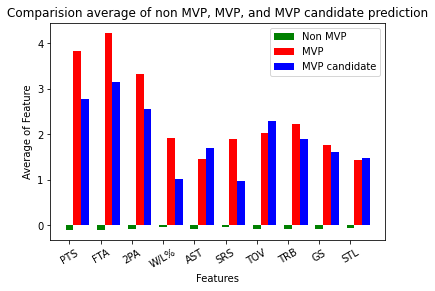

In [ ]:
import matplotlib.pyplot as plt
N = 10
ind = np.arange(N) 
width = 0.25
  
bar1 = plt.bar(ind, avg_list0 , width, color = 'g')
  
bar2 = plt.bar(ind+width, avg_list1, width, color='r')
  
bar3 = plt.bar(ind+width*2, avg_list2, width, color = 'b')
  
plt.xlabel("Features")
plt.ylabel('Average of Feature')
plt.title("Comparision average of non MVP, MVP, and MVP candidate prediction")
  
plt.xticks(np.arange(10),accurated_classified.columns[0:10], rotation = 30)
plt.legend( (bar1, bar2, bar3), ('Non MVP', 'MVP', 'MVP candidate') )
plt.show()

# Creating table with non-standardized stats

# This model which trained from year 1991 to 2021 matches with 1 player on their top 10 MVP prediction.

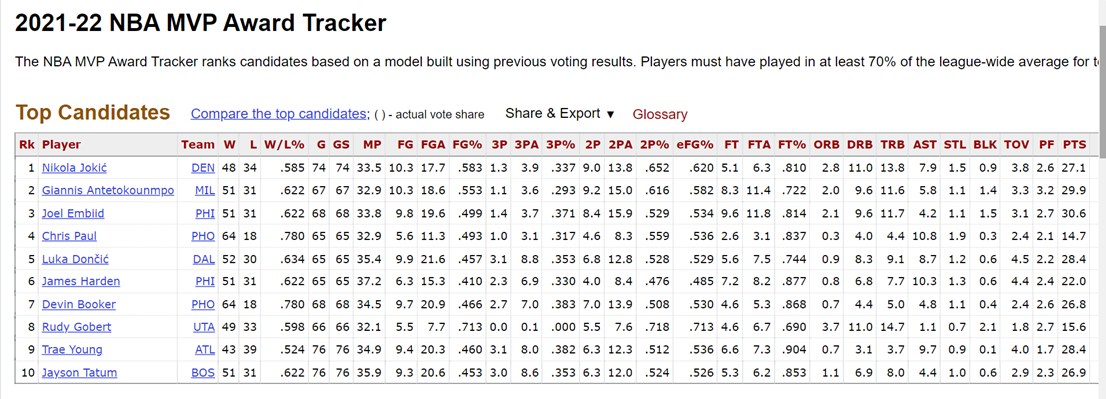